# Time Series Projections & Business Performance:

***This section of data is all fabricated from a fake business***

A fairly new business owner named Tom had an incredible idea to revolutionize the streaming world. He had developed a platform for streaming that would house the worlds top social media influencers, gamers, and high priority figures. The business model was simple, pay a monthly subscription fee and you gain access! The first 2 years Tom saw incredible growth and was very happy, but over the last 3 years he isn't sure how to properly measure his growth and project how the business will continue to do! So Tom has decided to hire us as his analytics team to assess his subscription and cancellation data and give him a thorough report on our findings!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from seaborn import pairplot, heatmap
import matplotlib.pyplot as plt
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


References:

https://blog.usejournal.com/data-visualization-view-count-growth-rates-with-python-and-matplotlib-3bf46ff24a09

https://towardsdatascience.com/forecasting-in-python-with-facebook-prophet-29810eb57e66

https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

In [2]:
toms_biz_df = pd.read_csv('/Users/mitchellambing/desktop/Portfolio Predictions/subs_v_cancels.csv', encoding='latin-1') 

In [3]:
toms_biz_df.head()

,date_trunc,subscriptions,cancellations
0,2017-01-01,2208,1677
1,2017-02-01,2067,1613
2,2017-03-01,2707,1937
3,2017-04-01,3289,1940
4,2017-05-01,3244,2158


In [4]:
toms_biz_df.dtypes

date_trunc       object
subscriptions     int64
cancellations     int64
dtype: object

So what we're working with is fairly starightforward, subs numbers, cancellation numbers and their associated truncated months (this is great so we don't have to worry about sensitive client data). 

In [5]:
toms_biz_df['date_trunc'] = pd.to_datetime(toms_biz_df['date_trunc'])
toms_biz_df = toms_biz_df.set_index('date_trunc')

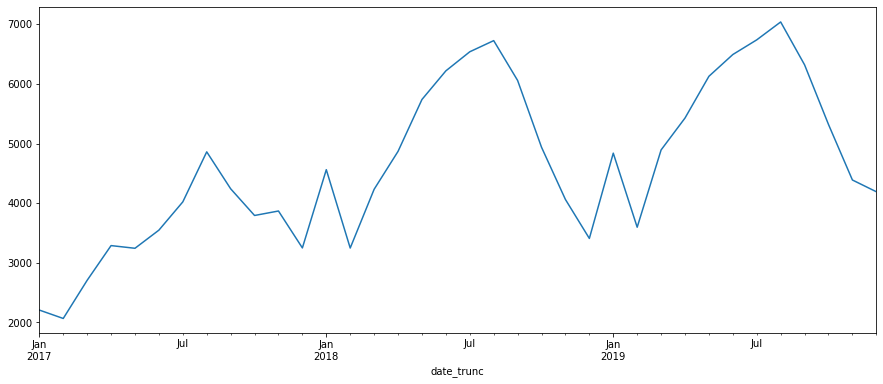

In [6]:
y = toms_biz_df['subscriptions'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

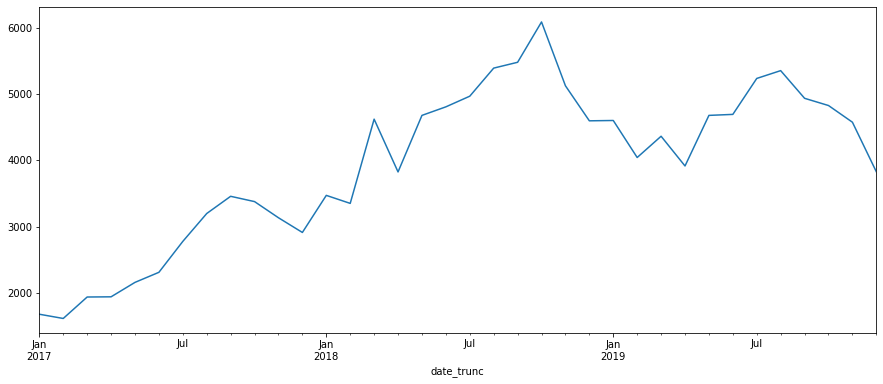

In [7]:
y2 = toms_biz_df['cancellations'].resample('MS').mean()
y2.plot(figsize=(15, 6))
plt.show()

So its clear that the business sees some seasonality with it subs and cancels, I think it'd be best to first explore what our net new subscriptions are MoM and what the % change looks like.

In [8]:
toms_biz_df['net_new_subs'] = (toms_biz_df['subscriptions'] - toms_biz_df['cancellations'])
toms_biz_df['MoM_sub_change'] = toms_biz_df.subscriptions.diff()
toms_biz_df['MoM_cancel_change'] = toms_biz_df.cancellations.diff()

In [9]:
print("Tom's Net New Subs for the last 3 years is:" + ' ' +str(sum(toms_biz_df['net_new_subs'])))
print("Tom's Total Subs for the last 3 years is:" + ' ' +str(sum(toms_biz_df['subscriptions'])))
print("Tom's Total Cancellations for the last 3 years is:" + ' ' +str(sum(toms_biz_df['cancellations'])))

Tom's Net New Subs for the last 3 years is: 25095
Tom's Total Subs for the last 3 years is: 167080
Tom's Total Cancellations for the last 3 years is: 141985


In [10]:
toms_biz_df['sub_%_change'] = toms_biz_df['subscriptions'].pct_change()*100
toms_biz_df['cancellations_%_change'] = toms_biz_df['cancellations'].pct_change()*100

In [11]:
print('The average % change month over month for subs is:' + ' ' + str(toms_biz_df['sub_%_change'].mean()))
print('The average % change month over month for cancellations is:' + ' ' + str(toms_biz_df['cancellations_%_change'].mean()))

The average % change month over month for subs is: 3.4918216357165184
The average % change month over month for cancellations is: 3.1228893083450537


In [12]:
toms_biz_df

,subscriptions,cancellations,net_new_subs,MoM_sub_change,MoM_cancel_change,sub_%_change,cancellations_%_change
date_trunc,,,,,,,
2017-01-01,2208,1677,531,NaN,NaN,NaN,NaN
2017-02-01,2067,1613,454,-141.0,-64.0,-6.385870,-3.816339
2017-03-01,2707,1937,770,640.0,324.0,30.962748,20.086795
2017-04-01,3289,1940,1349,582.0,3.0,21.499815,0.154879
2017-05-01,3244,2158,1086,-45.0,218.0,-1.368197,11.237113
2017-06-01,3548,2310,1238,304.0,152.0,9.371147,7.043559
2017-07-01,4022,2777,1245,474.0,467.0,13.359639,20.216450
2017-08-01,4861,3198,1663,839.0,421.0,20.860269,15.160245
2017-09-01,4242,3458,784,-619.0,260.0,-12.734005,8.130081


Its clear that the business is performing ok and continuing to grow, Toms subs growth rate % MoM averages out to be less approx. 3.5% for the last 3 years. This is breaking things down directly to MoM though and if we look also at quarterly or even yearly figures than we can see with the Net New Subscriptions sitting at 25095 his growth is healthy. 

What we can also take away from this is that very clearly each year the bottom end of Q1 seems to have a nice boom for subscriptions that maintains growth through Q3, but each year in Q4 the business is seeing drops in subscriptions, these trends seem to run similar to the cancellations as well. What Tom should do is a reassessment of marketing funds he may be using in Q4 to really ramp things up in his stronger quarters, and whats interesting is January generally has a spike but feathers off the rest of Q1, so maybe optimizing on this surge in January to continue that trend through Q1 to have a very strong year. 

Next we will build a few quality visualizations for Tom to look through for hitting his growth targets and then we will start to do some time series projections for the business. 

In [13]:
GrowthRates = []
class1 = []
class2 = []
class3 = []
class4 = []
green = []
red = []

In [14]:
for i in range(len(toms_biz_df['subscriptions'])):
    if i != 35:
        present = toms_biz_df['subscriptions'][i+1]
        yesterday = toms_biz_df['subscriptions'][i]
        GR = present/yesterday * 100
        GrowthRates.append(GR)
        if GR > 200:
            class1.append(i)
        elif GR > 150:
            class2.append(i)
        elif GR > 100:
            class3.append(i)
        else:
            class4.append(i)
        
        if GR > 100:
            green.append(i)
        else:
            red.append(i)

In [15]:
x = list(range(35))

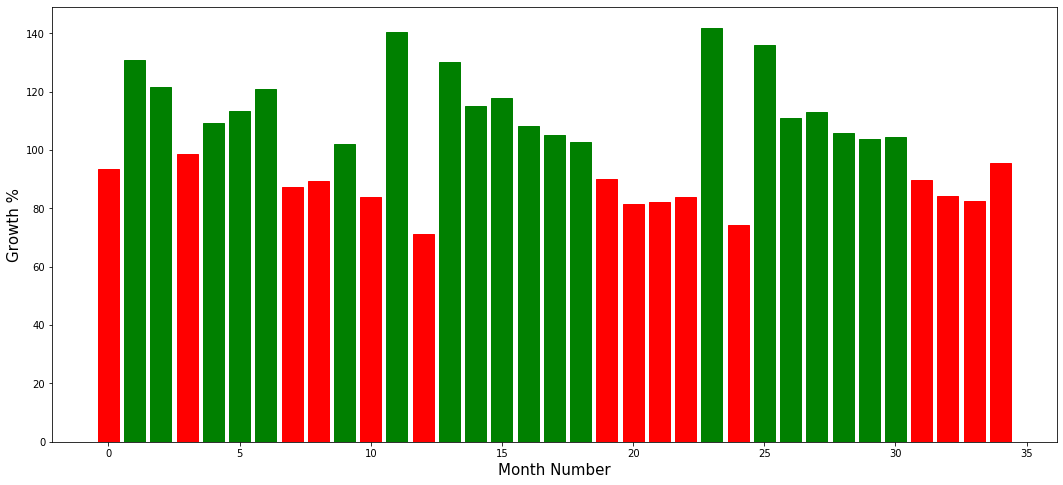

In [18]:
bars = plt.bar(x, GrowthRates, align='center')
for i in range(len(green)):
    bars[green[i]].set_color('green')
for i in range(len(red)):
    bars[red[i]].set_color('red')
plt.ylabel('Growth %', fontsize=15)
plt.xlabel('Month Number', fontsize=15)
plt.show()

### Takeaways from above: 

1) We had positive subscription growth in 57% of the months.

2) Like we mentioned above there is seasonal trends for when our growth typically happens.

3) Because our MoM growth is quite sporadic there may be other growth factors that Tom should explore.

4) As mentioned before, it is clear that there are pockets around Q4 Tom should look into how he is allocating his spend as there is no major growth happening ech year at that time.

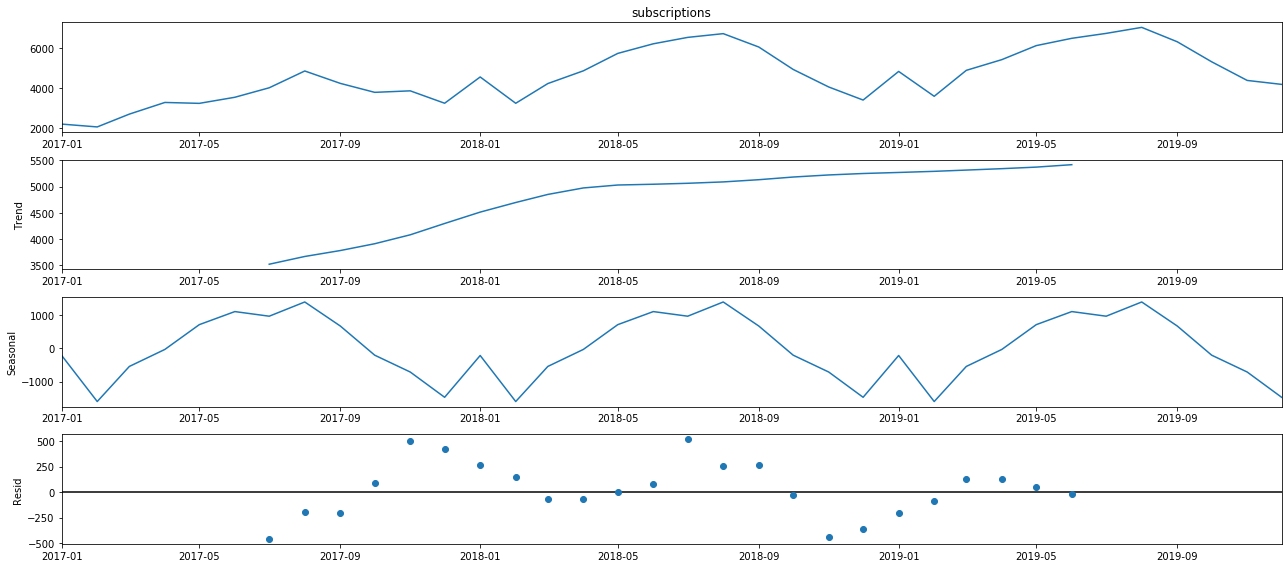

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
import statsmodels.api as sm
warnings.filterwarnings("ignore")

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

So this confirms that Tom does absolutly have seasonality, and as for the trend line, things are progressing up since 2017. That does mean that sustainable growth is happening, but Tom may require some business changes to continue on this trend as his cancellation data may end up running par with subscriptions (which he can discover via some A/B tests with his users. Primary focus to increase the typcial subscription lifespan, continue to increase net new subs and decrease cancellation numbers). 

Last section here is to try out Facebooks Prophet for time series projections.

In [19]:
toms_df = pd.read_csv('/Users/mitchellambing/desktop/Portfolio Predictions/subs_v_cancels.csv', encoding='latin-1') 
toms_df['date_trunc'] = pd.to_datetime(toms_df['date_trunc'])

In [22]:
# you will need to pip install fbprophet if you do not have this package
from fbprophet import Prophet
df_subs = toms_df.rename(columns={'date_trunc': 'ds', 'subscriptions': 'y'})

In [21]:
df_subs_model = Prophet(interval_width=0.95)
df_subs_model.fit(df_subs)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

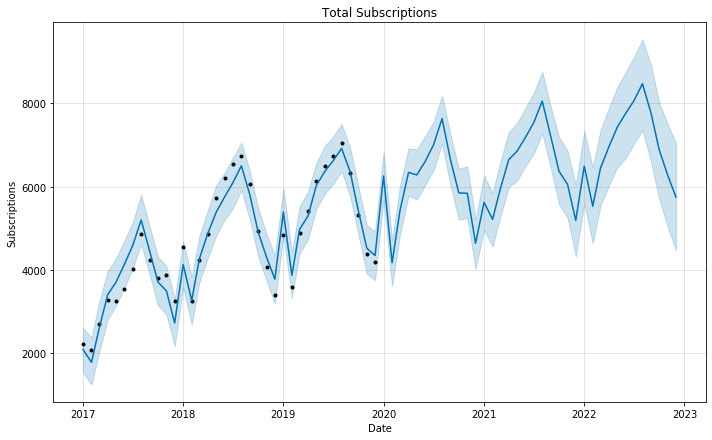

In [23]:
subscription_forecast = df_subs_model.make_future_dataframe(periods=36, freq='MS')
subscription_forecast = df_subs_model.predict(subscription_forecast)

plt.figure(figsize=(18, 6))
df_subs_model.plot(subscription_forecast, xlabel = 'Date', ylabel = 'Subscriptions')
plt.title('Total Subscriptions');

So it looks like, from a linear perspective, our Subs are trending up for Tom's streaming business, and should continue to do so with only a small bit of standard error on the amount the business should see. Now I'd like to try this with just the cancellations data to see what we produce, then run the two concurrently. 

In [24]:
df_cancels = toms_df.rename(columns={'date_trunc': 'ds', 'cancellations': 'y'})
df_cancels_model = Prophet(interval_width=0.95)
df_cancels_model.fit(df_cancels)

cancellation_forecast = df_cancels_model.make_future_dataframe(periods=36, freq='MS')
cancellation_forecast = df_cancels_model.predict(cancellation_forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

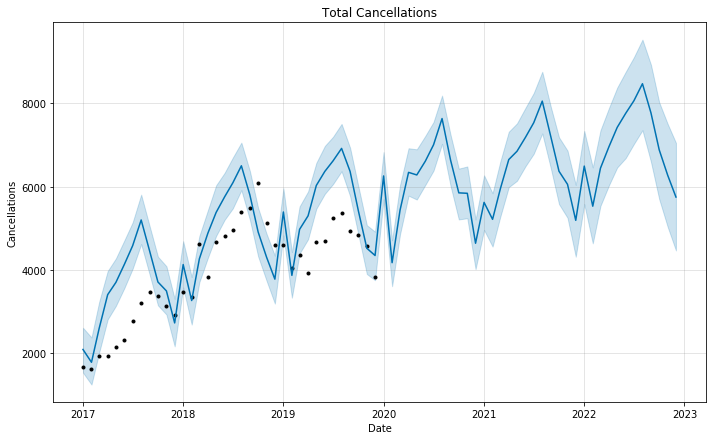

In [25]:
plt.figure(figsize=(18, 6))
df_cancels_model.plot(subscription_forecast, xlabel = 'Date', ylabel = 'Cancellations')
plt.title('Total Cancellations');

So Tom does need to be aware that his cancellations are trending at a very similar pace to his subscriptions, so his Net new subs are key to keep on top of for understanding his new revenue vs reccurring revenue.

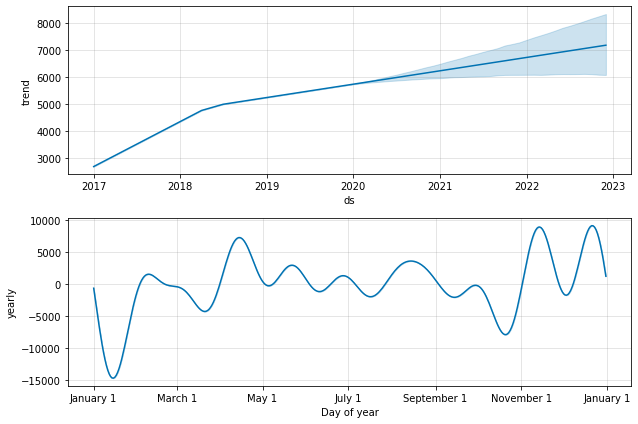

In [26]:
df_subs_model.plot_components(subscription_forecast);

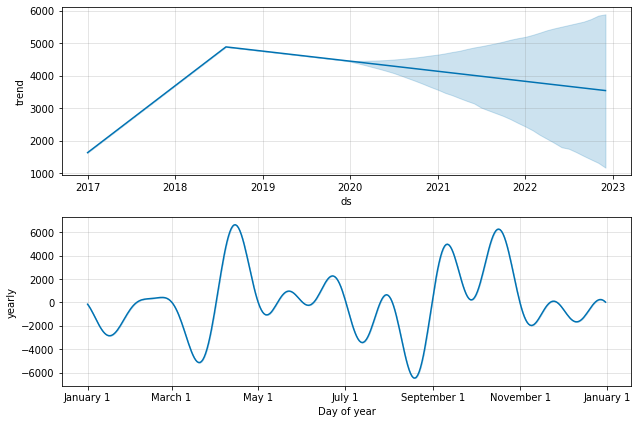

In [27]:
df_cancels_model.plot_components(cancellation_forecast);

All in all I'd say that Tom's business is fairing quite well. He has had decent YoY growth, from 2017 to 2018 some unprecidented growth of 47.5% then from 2018 to 2019 growth of 7.9%. As the business is still young and the numbers are still slightly irregular Tom should really focus in on what is working in his upward trending months and either remove null efforts in Q1 and Q4 to up the spend the company has in the other quarters or look into some new ways to monetize the product for those low quarters. 

When looking into cancellation numbers things aren't too big to be a massive cause for concern, but to start seeing better numbers on the books for recurring revenue a sustainable approach to retention should be looked into, and again this could be something like tweaking how the product services certain users (try some tests and see what works with your segmented users).

Hopefully Tom can now look at this report and gain better understanding of his last 3 years for subscriptions and cancellations and apply thatknowledge to better understanding his marketing efforts, his product efforts and of course his revenue.